This notebook tries to deal or rather combine multiple signals that are supposed to point to the same outcome. That is signals have the same information source, however, to a different degree that information is imperfect or content is not clean.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$x_1$, $x_2$ and $x_3$ are our signals $[0,1]$ which we can treat as probability whether some outcome $y \in \{0,1\}$. For this experiment I do not have real data, so have chosen random uniform variables for the signals, however, typically they could be correlated and aligned in which cases furhter analysis of those events can be done. We also have three signals here, however, the process can be done for any number of signals.

In [2]:
N = 1000
x1 = np.random.uniform(0,1,N)
x2 = np.random.uniform(0,1,N)
x3 = np.random.uniform(0,1,N)
y = np.random.choice([0,1],N)

The aim is to weighted average blend the signals. For that matter we simulate a weighted average of each sample in $x_1$, $x_2$ and $x_3$ by multiplying it with three random weights $w$ generated from a Dirichlet distribution $Dir(\alpha)$ due to its property $\sum_{x \in Dir} x = 1$, with concentration parameter $\alpha=1$ resulting in all sets of probabilities being equally likely, i.e., in this case the Dirichlet distribution of dimension $k$ is equivalent to a uniform distribution over our choice of number of dimensions. We choose number of simulations $N$ and a decision threshold $d$ above which we assume $y=1$.

In [3]:
d = 0.5
w = np.random.dirichlet(alpha=[1,1,1], size=N)
wx1, wx2, wx3 = [w.take(z,1) for z in range(3)]
x = np.stack([x1,x2,x3], axis=1)

In [4]:
precision = []
for weight in w:
    precision.append([len(set(o)) == 1 for o in ((x * weight) > d)].count(True) / N)

Because the three signals are uniformly distributed, the highest precision is a blend where each signal approaches $\frac{1}{3}$. This shows that there is no consistent information content in our data. And because we are randomly guessing the outcome which has two classes, the worst precision converges to 50%.

In [5]:
columns = ['SIGNAL1', 'WEIGHT_SIGNAL1', 'SIGNAL2', 'WEIGHT_SIGNAL2', 'SIGNAL3', 'WEIGHT_SIGNAL3', 'PRECISION']
data = [x1.round(3), wx1.round(3), x2.round(3), wx2.round(3), x3.round(3), wx3.round(3), precision]
sim_data = pd.DataFrame(np.stack(data, axis=1), columns=columns)
display(sim_data.sort_values('PRECISION', ascending=False))
sim_data.sort_values('PRECISION', ascending=False).head(50).mean(axis=0)

,SIGNAL1,WEIGHT_SIGNAL1,SIGNAL2,WEIGHT_SIGNAL2,SIGNAL3,WEIGHT_SIGNAL3,PRECISION
607,0.781,0.449,0.536,0.460,0.062,0.091,1.000
878,0.340,0.341,0.177,0.327,0.175,0.332,1.000
876,0.090,0.379,0.851,0.496,0.368,0.124,1.000
214,0.814,0.435,0.050,0.138,0.090,0.427,1.000
877,0.298,0.102,0.655,0.467,0.575,0.431,1.000
...,...,...,...,...,...,...,...
687,0.110,0.036,0.562,0.961,0.974,0.003,0.509
224,0.697,0.962,0.254,0.035,0.755,0.003,0.506
674,0.321,0.005,0.926,0.974,0.296,0.021,0.501
215,0.027,0.004,0.222,0.988,0.565,0.007,0.498


SIGNAL1           0.53832
WEIGHT_SIGNAL1    0.36340
SIGNAL2           0.49488
WEIGHT_SIGNAL2    0.32122
SIGNAL3           0.55174
WEIGHT_SIGNAL3    0.31540
PRECISION         1.00000
dtype: float64

To visualize how well the signals perform against our outcome $y$ we can plot them interchangeably and notice the highest precision when the signals approach $\frac{1}{3}$:

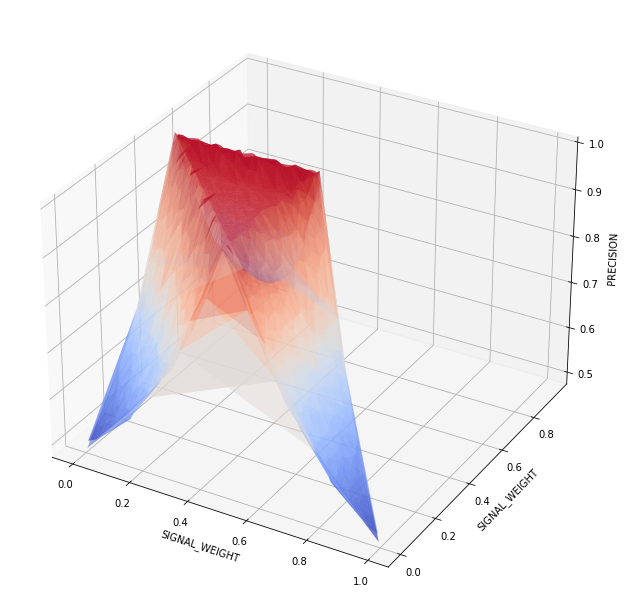

In [6]:
fig = plt.figure(figsize=(11,11))
ax = plt.axes(projection='3d')
colour = plt.get_cmap('coolwarm')

ax.plot_trisurf(wx1, wx3, precision, alpha=0.5, cmap=colour)
ax.plot_trisurf(wx2, wx3, precision, alpha=0.5, cmap=colour)
ax.plot_trisurf(wx1, wx3, precision, alpha=0.5, cmap=colour)
ax.set_xlabel('SIGNAL_WEIGHT')
ax.set_ylabel('SIGNAL_WEIGHT')
ax.set_zlabel('PRECISION')
plt.show()